In [1]:
# Logistic regession, Neural Network, and XG Boost

In [2]:
#from platform import python_version
#python_version()
#import tensorflow as tf

In [3]:
# read the feature description txt. file and make a list of feature names
features_list = [] 
fh = open('TicDataDescr.txt', 'r')
for i, line in enumerate(fh):
    if 32 < i < 51: # 204:
        features_list.append(line.rstrip('\n')[2:])
    elif 51 <= i< 204:
        features_list.append(line.rstrip('\n')[3:])
fh.close()

while '' in features_list:
    features_list.remove('')
#print(features_list)
#len(features_list)

In [4]:
import pandas as pd
df = pd.read_table('ticdata2000.txt', names=features_list) # assign the feature names from the list prepared before
#df_test = pd.read_table('ticeval2000.txt', names=features_list) # test data set

In [5]:
# Find the total number of positive class in the target - baseline
ls = list(df['CARAVAN Number of mobile home policies 0 - 1'].values)
num_policy_users = ls.count(1)
num_nonusers = ls.count(0)
users_perc = num_policy_users*100/(num_policy_users+num_nonusers)
print(num_policy_users, users_perc)

348 5.977327378907592


We have a baseline for our models here, 348 out of 5822 customers, which is about 6%, own the insurence policy. This means only 6% of the total customers belong to the positive class and hence the data is unbalanced.

In [6]:
df.describe()

,MOSTYPE Customer Subtype see L0,MAANTHUI Number of houses 1 – 10,MGEMOMV Avg size household 1 – 6,MGEMLEEF Avg age see L1,MOSHOOFD Customer main type see L2,MGODRK Roman catholic see L3,MGODPR Protestant ...,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies,CARAVAN Number of mobile home policies 0 - 1
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [7]:
from sklearn import preprocessing
import numpy as np

In [8]:
X = df.drop('CARAVAN Number of mobile home policies 0 - 1',axis = 1) #feature
y = df['CARAVAN Number of mobile home policies 0 - 1'] #target

#rescale X
x = X.values #nd array
stan_scaler = preprocessing.StandardScaler()
x_scaled = stan_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df['target'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,target
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.914449,-0.27258,-2.125697,-1.216964,0.779405,-0.694311,0.800298,-0.068711,-0.787790,-2.714813,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
5818,0.836602,-0.27258,1.672893,1.238473,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0
5819,0.680906,-0.27258,0.406697,1.238473,0.779405,-0.694311,0.800298,-1.051594,-0.161816,-0.619824,...,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,1
5820,0.758754,-0.27258,0.406697,-1.216964,0.779405,-0.694311,1.383152,-1.051594,-0.787790,0.427670,...,-0.073165,-0.081055,-0.05992,-1.014358,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816,0


In [9]:
# Logistic regression with Upsampling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0)
print(y_train.value_counts()) # count the numbers of 0 and 1 before sampling
smt = SMOTE(random_state = 0)
X_train_os, y_train_os = smt.fit_resample(X_train, y_train)
y_train_os.value_counts()
#print(np.bincount(y_train1)) # count the numbers of 0 and 1 after sampling

CARAVAN Number of mobile home policies 0 - 1
0    4113
1     253
Name: count, dtype: int64


CARAVAN Number of mobile home policies 0 - 1
0    4113
1    4113
Name: count, dtype: int64

In [11]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000) # instantiate the model
logreg.fit(X_train_os,y_train_os) # fit the data
y_pred = logreg.predict(X_test) 
#X['MOSTYPE Customer Subtype see L0']

In [12]:
# Model evaluation by confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[981, 380],
       [ 42,  53]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

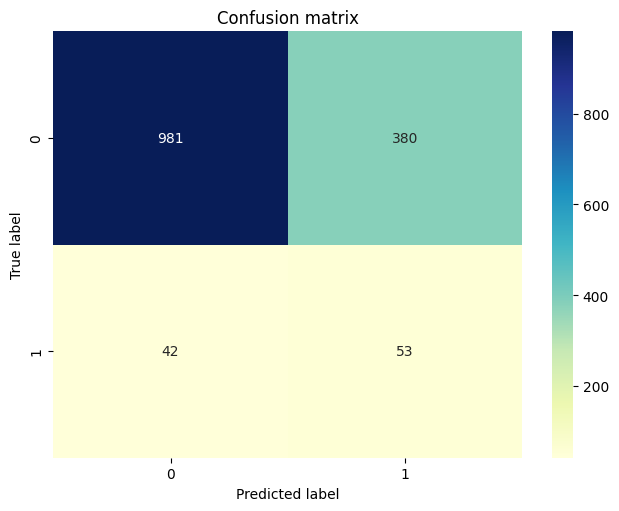

In [13]:
# Visualize the confusion matrix by using a heatmap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [14]:
# model evaluation by accuracy, precission and Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7101648351648352
Precision: 0.12240184757505773
Recall: 0.5578947368421052


Out of all predicted as positive, 12 percentage are actually positive (precision), which is significantly better than the 6 perc baseline.
Out of all positive cases from the data, 56 percentages are correctly predicted. 

In [15]:
y_pred_train = logreg.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix

array([[3019, 1094],
       [  66,  187]], dtype=int64)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))

Accuracy: 0.7343105817682088
Precision: 0.14597970335675253
Recall: 0.7391304347826086


In [17]:
## Tune hyperparameter - Logistic regression doesn't really nead hyperparameter tuining, we do it anayway
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=0, max_iter = 100, 1000)
clf.fit(X_train_os,y_train_os) # fit the data
y_pred = clf.predict(X_test) 

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[980, 381],
       [ 42,  53]], dtype=int64)

Hyperparameter tuning (tune the algorethim used, and the strength of regularization) marginally improves the performance.

In [19]:
## Use Recursive Feature Ellimination - Since we saw many 
from sklearn.feature_selection import RFE

In [20]:
#logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=40, step=1)
rfe = rfe.fit(X_train_os, y_train_os)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False  True False False  True  True  True
  True  True  True False False False False False  True False False False
  True False False False False  True  True  True  True  True  True  True
  True  True  True  True False False False  True False False  True  True
 False  True  True False  True False  True False False  True  True False
 False False False False  True False  True False  True False False  True
 False False False  True False False  True  True False  True False False
 False]
[ 1  1 40 13  1 37  1 41 36  1  1  1  1  1  1 43 32  7  5 25  1  4 39  6
  1 27 28  3 29  1  1  1  1  1  1  1  1  1  1  1 31 30 24  1 18 10  1  1
 14  1  1 45  1 16  1 38 33  1  1 23 11 34  8 42  1 46  1 35  1 44 15  1
 26 17  2  1 12 20  1  1 22  1 19  9 21]


In [21]:
print(X_train_os[:,0].shape)
print(X_test[:,0].shape)
support_list = list(rfe.support_)
X_train_rfe = np.empty(shape = (8226, 40))
X_test_rfe = np.empty(shape = (1456, 40))
#X_test_rfe  = 
#print(len(support_list))

(8226,)
(1456,)


In [22]:
j = 0
for ind, elem in enumerate(support_list):
    if elem == True:
        X_train_rfe[:,j] = X_train_os[:,ind]
        X_test_rfe[:,j] = X_test[:,ind]
        j += 1      

In [23]:
X_test_rfe.shape

(1456, 40)

In [24]:
logreg.fit(X_train_rfe, y_train_os) # fit the data

LogisticRegression(max_iter=1000)

In [25]:
y_pred = logreg.predict(X_test_rfe) 

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[962, 399],
       [ 42,  53]], dtype=int64)

In [27]:
# model evaluation by accuracy, precission and Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6971153846153846
Precision: 0.1172566371681416
Recall: 0.5578947368421052


Performes slightly worse, I tried different values (from 4 to 40) for the no.s of features, none of them improve performance.

In [28]:
## Neural Network

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [30]:
tf.random.set_seed(1234) # for consistent results

In [31]:
# model architeture
model = Sequential(
    [ 
        Dense(80, activation = 'relu'),
        Dense(40, activation = 'relu'),
        Dense(1, activation = 'sigmoid'), 
    ])

#model.summary()

In [32]:
# compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
) #0.001 is actually the default value

In [33]:
# fit
history = model.fit(X_train_os, y_train_os, epochs=20, batch_size = 64)

Epoch 1/20
129/129 [==============================] - 2s 3ms/step - loss: 0.5201
Epoch 2/20
129/129 [==============================] - 0s 3ms/step - loss: 0.3740
Epoch 3/20
129/129 [==============================] - 0s 3ms/step - loss: 0.2929
Epoch 4/20
129/129 [==============================] - 0s 3ms/step - loss: 0.2341
Epoch 5/20
129/129 [==============================] - 0s 3ms/step - loss: 0.1905
Epoch 6/20
129/129 [==============================] - 0s 4ms/step - loss: 0.1543
Epoch 7/20
129/129 [==============================] - 0s 3ms/step - loss: 0.1324
Epoch 8/20
129/129 [==============================] - 0s 3ms/step - loss: 0.1117
Epoch 9/20
129/129 [==============================] - 0s 4ms/step - loss: 0.0983
Epoch 10/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0858
Epoch 11/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 12/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0688
Epoch 13/20
129/129 [====

In [34]:
#def create_baseline(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), \
#                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)):
    
#    model = Sequential()
#    model.add(Dense(40, activation='relu', input_dim=n_cols))
#    model.add(Dense(20, activation='relu'))
#    model.add(Dense(1, activation='linear'))
    
#    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy']) 
#    return model

In [35]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

46/46 [==============================] - 0s 2ms/step
[[1258  103]
 [  75   20]]
Accuracy: 0.8777472527472527
Precision: 0.16260162601626016
Recall: 0.21052631578947367


In [36]:
y_pred = (model.predict(X_train) > 0.5).astype("int32")
cm = metrics.confusion_matrix(y_train, y_pred)
#print(y_pred)
## calculate model performance
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Precision:",metrics.precision_score(y_train, y_pred))
print("Recall:",metrics.recall_score(y_train, y_pred))

137/137 [==============================] - 0s 2ms/step
[[4027   86]
 [   5  248]]
Accuracy: 0.9791571232249199
Precision: 0.7425149700598802
Recall: 0.9802371541501976


 It shows overfitting, lets plot the loss (J) (for both train and test) as a function of time. We expect a higher loss for the test data.

In [37]:
train_loss = history.history['loss']
train_loss
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

[0.5201407670974731,
 0.3739963173866272,
 0.29294097423553467,
 0.23412832617759705,
 0.19051694869995117,
 0.15428388118743896,
 0.1324107050895691,
 0.11168496310710907,
 0.09834987670183182,
 0.08580894768238068,
 0.07873447239398956,
 0.06877138465642929,
 0.0682087317109108,
 0.06064306199550629,
 0.05592813715338707,
 0.052024755626916885,
 0.04567667841911316,
 0.045518822968006134,
 0.0443032942712307,
 0.04784354567527771]

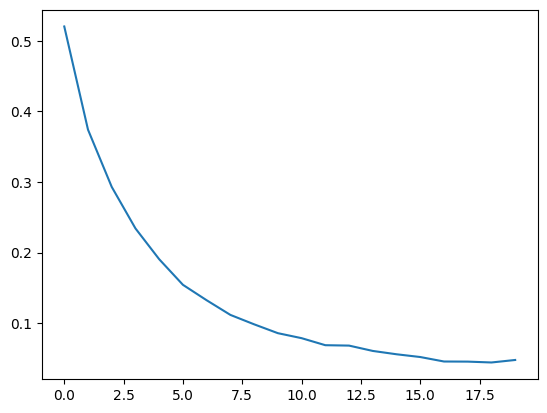

In [38]:
epo = range(20)
plt.plot(epo, train_loss)

In [39]:
## grid search CV
epochs = [10, 20, 30]
rate = [0.0005, 0.001, 0.005]

In [40]:
#from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
#from time import time

In [41]:
def create_baseline(optimizer):
    model = Sequential()
    model.add(Dense(80, activation = 'relu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)
    
    return model

In [42]:
base_model = KerasClassifier(build_fn=create_baseline, verbose = 0)

C:\Users\sbnad\AppData\Local\Temp\ipykernel_7788\1426700400.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  base_model = KerasClassifier(build_fn=create_baseline, verbose = 0)


In [43]:
parameters = {'batch_size': [32, 64, 128],
              'epochs': [10, 20, 30],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = base_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train_os, y_train_os, verbose = 0)

52/52 [==============================] - 0s 2ms/step


In [44]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print(best_parameters)
print(best_score)

{'batch_size': 32, 'epochs': 30, 'optimizer': 'rmsprop'}
0.9643845815775187


In [45]:
# compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam()
)

history = model.fit(X_train_os, y_train_os, epochs=20, batch_size = 64)

Epoch 1/20
129/129 [==============================] - 1s 3ms/step - loss: 0.0517
Epoch 2/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 3/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 4/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0412
Epoch 5/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 6/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 7/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 8/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 9/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 10/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 11/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 12/20
129/129 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 13/20
129/129 [====

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = metrics.confusion_matrix(y_test, y_pred)
#print(y_pred)
## calculate model performance
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

46/46 [==============================] - 0s 2ms/step
[[1270   91]
 [  78   17]]
Accuracy: 0.8839285714285714
Precision: 0.1574074074074074
Recall: 0.17894736842105263


So the best NN has 89 perc accuracy, 16 perc precision, and recall of 15 perc. A few observations: The training results are much better 
than the test results suggesting overfitting. I tried to mitigate it by decreasing the size of the neural network,
but it did not really work. When can change the network arctiture and the hyperparameters to bring the training 
efficiency lower, the test results again get extremely bad. In other words, I find a huge performance gap between 
training and testing. Ideally, I would try to reduce the gap by not overfitting the neural network, but in this case,
I do not seem to suceed. Is there a resolution, or I should just accept that this is the limitation of this data and model?

## Other models

In [1]:
#import sys
#!{sys.executable} -m pip install xgboost

In [48]:
# Other classifiers
from xgboost import XGBClassifier

In [49]:
## I will do GCV for XGB
df = pd.DataFrame()
n_estimators = [20,50]
max_depth = [4,6,8]
eta = [0.01, 0.1]
param = [[i,j,k] for i in n_estimators for j in max_depth for k in eta]
acc, pre, rec = [], [], []
acct, pret, rect = [], [], []
for para in param:
    model = XGBClassifier(n_estimators=para[0], max_depth=para[1], eta=para[2], subsample=0.7, colsample_bytree=0.8)
    model.fit(X_train_os, y_train_os)
    y_pred = (model.predict(X_train) > 0.5).astype("int32")
    #cm = metrics.confusion_matrix(y_train, y_pred)
    #print(model)
    #print(cm)
    #print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
    #print("Precision:",metrics.precision_score(y_train, y_pred))
    #print("Recall:",metrics.recall_score(y_train, y_pred))
    acc.append(metrics.accuracy_score(y_train, y_pred))
    pre.append(metrics.precision_score(y_train, y_pred))
    rec.append(metrics.recall_score(y_train, y_pred))
    
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    #cm = metrics.confusion_matrix(y_train, y_pred)
    #print(model)
    #print(cm)
    #print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
    #print("Precision:",metrics.precision_score(y_train, y_pred))
    #print("Recall:",metrics.recall_score(y_train, y_pred))
    acct.append(metrics.accuracy_score(y_test, y_pred))
    pret.append(metrics.precision_score(y_test, y_pred))
    rect.append(metrics.recall_score(y_test, y_pred))

df['params'] = param
df['train_accuracy'] = acc
df['train_precision'] = pre
df['train_recall'] = rec

df['test_accuracy'] = acct
df['test_precision'] = pret
df['test_recall'] = rect

In [50]:
df

,params,train_accuracy,train_precision,train_recall,test_accuracy,test_precision,test_recall
0,"[20, 4, 0.01]",0.827073,0.157104,0.454545,0.800824,0.137546,0.389474
1,"[20, 4, 0.1]",0.876088,0.218750,0.442688,0.857830,0.178161,0.326316
2,"[20, 6, 0.01]",0.880440,0.215645,0.403162,0.861264,0.183432,0.326316
3,"[20, 6, 0.1]",0.923500,0.356890,0.399209,0.898352,0.221053,0.221053
4,"[20, 8, 0.01]",0.914567,0.317073,0.411067,0.885989,0.196581,0.242105
5,"[20, 8, 0.1]",0.939762,0.480159,0.478261,0.901786,0.184211,0.147368
6,"[50, 4, 0.01]",0.828676,0.165088,0.482213,0.809753,0.147287,0.400000
7,"[50, 4, 0.1]",0.934952,0.408284,0.272727,0.914835,0.236364,0.136842
8,"[50, 6, 0.01]",0.883646,0.222222,0.403162,0.866071,0.191358,0.326316
9,"[50, 6, 0.1]",0.948465,0.607692,0.312253,0.923764,0.233333,0.073684


As can be seen from the table, within the range of the parameter space explored the model performance 
doesn't improve. So, the conclusion is that Logistic regression seems to be performing the best. We tried logistic regression classifier, Neural network, and XG Boost and logistic regression worked the best.